In [33]:
# importing the most libraries for analysis  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
import re
from datetime import datetime, timedelta,date
from sklearn.model_selection import KFold, cross_val_score, train_test_split
pd.set_option('display.max_columns', None)
import pandas_profiling as pp

In [2]:
train = pd.read_csv('train 3.csv')
test = pd.read_csv('test_QkPvNLx.csv')

In [3]:
train

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41
...,...,...,...,...,...,...,...,...,...,...,...
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.070,114
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.070,145
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.070,167
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.070,107


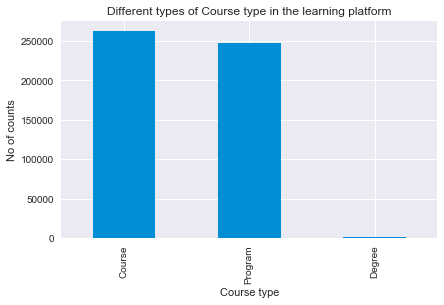

In [4]:
# # analysing Different types of Course type in the learning platform

train['Course_Type'].value_counts(normalize = True)
train['Course_Type'].value_counts().plot.bar()
plt.title('Different types of Course type in the learning platform')
plt.xlabel('Course type')
plt.ylabel('No of counts')
plt.show()

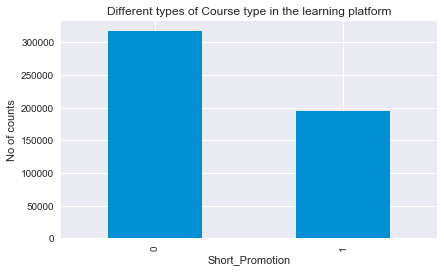

In [5]:
# # analysing the short promotion in the learning platform

train['Short_Promotion'].value_counts(normalize = True)
train['Short_Promotion'].value_counts().plot.bar()
plt.title('Different types of Course type in the learning platform')
plt.xlabel('Short_Promotion')
plt.ylabel('No of counts')
plt.show()

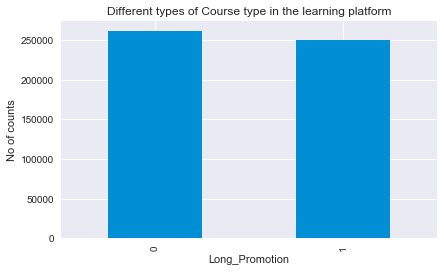

In [6]:
# # analysing Long Promotion in the learning platform
train['Long_Promotion'].value_counts(normalize = True)
train['Long_Promotion'].value_counts().plot.bar()
plt.title('Different types of Course type in the learning platform')
plt.xlabel('Long_Promotion')
plt.ylabel('No of counts')
plt.show()

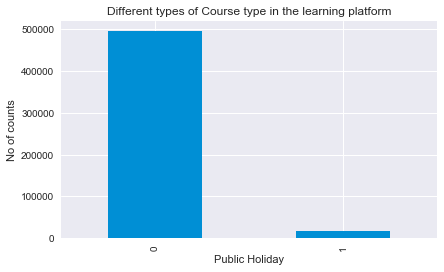

In [7]:
# # analysing only the item types in the stores

train['Public_Holiday'].value_counts(normalize = True)
train['Public_Holiday'].value_counts().plot.bar()
plt.title('Public Holidays given in the learning platform')
plt.xlabel('Public Holiday')
plt.ylabel('No of counts')
plt.show()

In [8]:
train.describe(include = 'all')

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087,512087,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
unique,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Development,Course,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,264295,262747,NaN,NaN,NaN,NaN,NaN,NaN
mean,274007.300650,434.917869,300.388344,NaN,NaN,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,NaN,NaN,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,NaN,NaN,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,NaN,NaN,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,NaN,NaN,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000


In [9]:
# checking the most unique items in the entire train data
train.apply(lambda x : len(x.unique()))

ID                    512087
Day_No                   882
Course_ID                600
Course_Domain              4
Course_Type                3
Short_Promotion            2
Public_Holiday             2
Long_Promotion             2
User_Traffic            3475
Competition_Metric       197
Sales                    544
dtype: int64

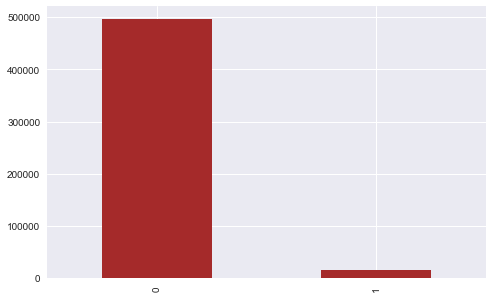

In [31]:
train['Public_Holiday'].value_counts().plot.bar(color = 'brown', figsize = (7,5))

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [12]:
train.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [13]:
train['Competition_Metric'].value_counts()

0.001    20800
0.003    18852
0.002    16390
0.004    15838
0.009    11980
         ...  
0.263      698
0.171      698
0.326      698
0.096      698
0.218      698
Name: Competition_Metric, Length: 196, dtype: int64

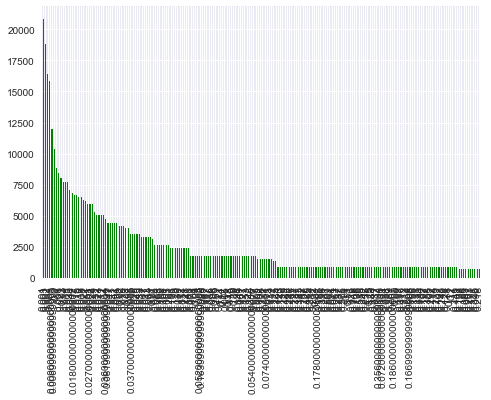

In [14]:
train['Competition_Metric'].value_counts().plot.bar(color = 'green', figsize = (7,5))

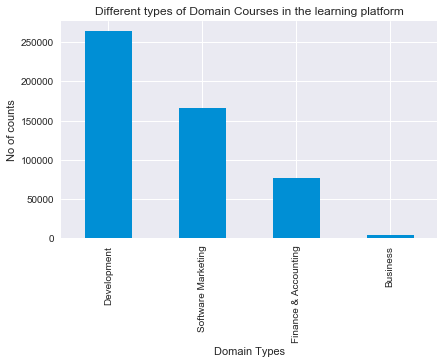

In [15]:
#  analysing only the Course Domains in the stores

train['Course_Domain'].value_counts(normalize = True)
train['Course_Domain'].value_counts().plot.bar()
plt.title('Different types of Domain Courses in the learning platform')
plt.xlabel('Domain Types')
plt.ylabel('No of counts')
plt.show()

In [16]:
train['Course_Domain'].value_counts()

Development             264295
Software Marketing      166172
Finance & Accounting     77210
Business                  4410
Name: Course_Domain, dtype: int64

In [17]:
# find correlations to target
corr_matrix = train.corr().abs()
print(corr_matrix['Sales'].sort_values(ascending=False).head(10))


Sales                 1.000000
User_Traffic          0.829741
Short_Promotion       0.367762
Public_Holiday        0.135052
Long_Promotion        0.109455
Day_No                0.060012
Competition_Metric    0.022085
ID                    0.017037
Course_ID             0.016894
Name: Sales, dtype: float64


In [18]:
# droping the ID and Course_ID variables

train.drop(['ID','Course_ID'], axis = 1, inplace = True)

In [19]:
train

,Day_No,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,Development,Course,0,1,1,11004,0.007,81
1,2,Development,Course,0,0,1,13650,0.007,79
2,3,Development,Course,0,0,1,11655,0.007,75
3,4,Development,Course,0,0,1,12054,0.007,80
4,5,Development,Course,0,0,1,6804,0.007,41
...,...,...,...,...,...,...,...,...,...
512082,878,Software Marketing,Program,0,0,1,8904,0.070,114
512083,879,Software Marketing,Program,0,0,1,10542,0.070,145
512084,880,Software Marketing,Program,0,0,1,13671,0.070,167
512085,881,Software Marketing,Program,0,0,1,8904,0.070,107


In [20]:
train['Competition_Metric'].isnull().sum()

1764

In [21]:
train['Competition_Metric'].nunique()

196

In [22]:
train['Competition_Metric'].value_counts()

0.001    20800
0.003    18852
0.002    16390
0.004    15838
0.009    11980
         ...  
0.263      698
0.171      698
0.326      698
0.096      698
0.218      698
Name: Competition_Metric, Length: 196, dtype: int64

In [23]:
train['Competition_Metric'] = train['Competition_Metric'].replace(0, np.NaN)

In [24]:
train.groupby('Competition_Metric').count()

,Day_No,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Sales
Competition_Metric,,,,,,,,
0.001,20800,20800,20800,20800,20800,20800,20800,20800
0.002,16390,16390,16390,16390,16390,16390,16390,16390
0.003,18852,18852,18852,18852,18852,18852,18852,18852
0.004,15838,15838,15838,15838,15838,15838,15838,15838
0.005,7754,7754,7754,7754,7754,7754,7754,7754
...,...,...,...,...,...,...,...,...
0.510,882,882,882,882,882,882,882,882
0.534,882,882,882,882,882,882,882,882
0.539,882,882,882,882,882,882,882,882


In [25]:
train.groupby('Competition_Metric')['Sales'].count()


Competition_Metric
0.001    20800
0.002    16390
0.003    18852
0.004    15838
0.005     7754
         ...  
0.510      882
0.534      882
0.539      882
0.637      882
0.768      882
Name: Sales, Length: 195, dtype: int64

In [26]:
train.groupby('Competition_Metric').mean()

,Day_No,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Sales
Competition_Metric,,,,,,
0.001,438.014615,0.380577,0.031202,0.618365,20939.754231,138.640048
0.002,437.076815,0.380476,0.031178,0.461867,19350.791458,129.991214
0.003,435.731700,0.380331,0.031827,0.485360,19671.665341,125.333652
0.004,430.056636,0.379720,0.032580,0.665867,18080.807741,124.575325
0.005,436.825251,0.380449,0.031855,0.658757,16774.501548,119.583699
...,...,...,...,...,...,...
0.510,441.500000,0.380952,0.027211,0.000000,9240.833333,73.369615
0.534,441.500000,0.380952,0.034014,0.000000,21819.619048,192.739229
0.539,441.500000,0.380952,0.027211,0.000000,17152.595238,138.115646


In [27]:
train

,Day_No,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,Development,Course,0,1,1,11004,0.007,81
1,2,Development,Course,0,0,1,13650,0.007,79
2,3,Development,Course,0,0,1,11655,0.007,75
3,4,Development,Course,0,0,1,12054,0.007,80
4,5,Development,Course,0,0,1,6804,0.007,41
...,...,...,...,...,...,...,...,...,...
512082,878,Software Marketing,Program,0,0,1,8904,0.070,114
512083,879,Software Marketing,Program,0,0,1,10542,0.070,145
512084,880,Software Marketing,Program,0,0,1,13671,0.070,167
512085,881,Software Marketing,Program,0,0,1,8904,0.070,107
